In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('bmh')

In [2]:
data = pd.read_csv("daiktai_cleaned.csv", sep="ʃ", on_bad_lines='skip')

/tmp/ipykernel_26355/2905097904.py:1: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.
  data = pd.read_csv("daiktai_cleaned.csv", sep="ʃ", on_bad_lines='skip')


In [3]:
data.head()

,item_title,item_description,item_country,Sub_Category_1,Sub_Category_2
0,Šilko užvalkalai pagalvei,"Nauji, šilko užvalkalai sandratiniai pagalvei ...",Liettua,Namams,Tekstilė
1,Avalynė,"41 dydis Avalynė dėvėta, išvalius, nešiosote...",Liettua,Moterims,Avalynė
2,Gėlių stovai,"Gražūs, juodi su aukso spalvos kojomis, metali...",Liettua,Namams,Interjero akcentai
3,Kreminė bliuskyte,Nauja,Liettua,Moterims,Drabužiai
4,Tommy Hilfiger šlepetės,Naujos,Liettua,Moterims,Avalynė


In [4]:
print(data['item_description'].isna().sum())

0


In [5]:
print(data['item_title'].isna().sum())

0


In [6]:
print(data['Sub_Category_1'].value_counts()) 

Sub_Category_1
Moterims         1456791
Vaikams           987717
Vyrams            171332
Pramogos          110354
Namams             31579
Kids               10898
Women               6698
Gyvūnams            4124
Men                  406
Entertainment        297
Home                  65
Pet care              37
Name: count, dtype: int64


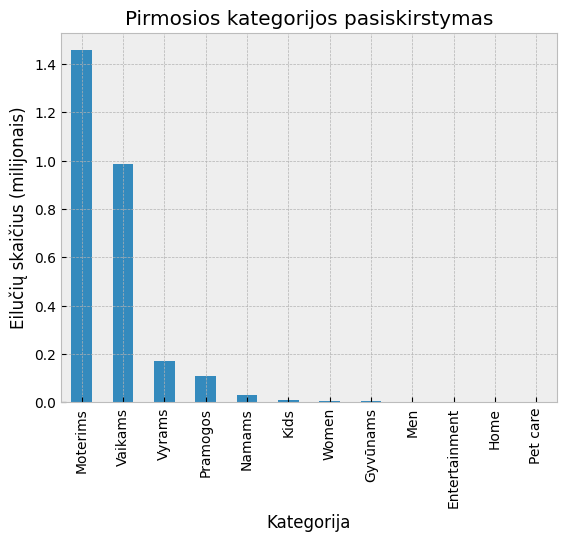

In [7]:
import matplotlib.ticker as mticker

counts = data['Sub_Category_1'].value_counts()

counts.plot(kind='bar')

plt.title('Pirmosios kategorijos pasiskirstymas')
plt.xlabel('Kategorija')
plt.ylabel('Eilučių skaičius (milijonais)')
plt.ticklabel_format(style='plain', axis='y')
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda y, _: f'{y/1e6:.1f}'))
plt.show()

In [8]:
print(data['Sub_Category_2'].value_counts())

Sub_Category_2
Drabužiai                      1243511
Apranga mergaitėms              517908
Apranga berniukams              348658
Avalynė                         160969
Aksesuarai                      155510
Knygos                           77418
Žaislai                          66544
Rankinės                         49462
Kūdikių ir vaikų priežiūra       23088
Kosmetika                        18671
Žaidimai ir galvosūkiai          16461
Visa kita                        12869
Interjero akcentai               11470
Muzika ir vaizdo turinys         10698
Stalo serviravimas                9761
Tekstilė                          6497
Vaizdo žaidimai ir konsolės       5777
Clothing                          5678
Boys clothing                     5268
Girls clothing                    5184
Mokyklos reikmenys                4992
Baldai vaikams                    4382
Vežimukai                         4362
Šventės                           3851
Judėjimo priemonės                2836
Šunys     

In [9]:
print(data['Sub_Category_1'].nunique())

12


In [10]:
print(data['Sub_Category_2'].nunique())

56


In [11]:
data['item_description'] = data['item_title'].astype(str) + " " + data['item_description'].astype(str)

print(data['item_description'].head(5))

0    Šilko užvalkalai pagalvei Nauji, šilko užvalka...
1    Avalynė 41 dydis   Avalynė dėvėta, išvalius, n...
2    Gėlių stovai Gražūs, juodi su aukso spalvos ko...
3                              Kreminė bliuskyte Nauja
4                       Tommy Hilfiger šlepetės Naujos
Name: item_description, dtype: object


In [48]:
from googletrans import Translator
import asyncio
translator = Translator(service_urls=[
      'translate.googleapis.com'
    ])

country_values = data['item_country'].value_counts()

In [49]:
country_names = country_values.reset_index()['item_country']\
    .apply(lambda x: translator.translate(x) )\
    .to_list()

country_names = asyncio.gather( *country_names )
country_names = [name.text for name in await country_names]

country_values = country_values.reset_index()
country_values['item_country'] = country_names

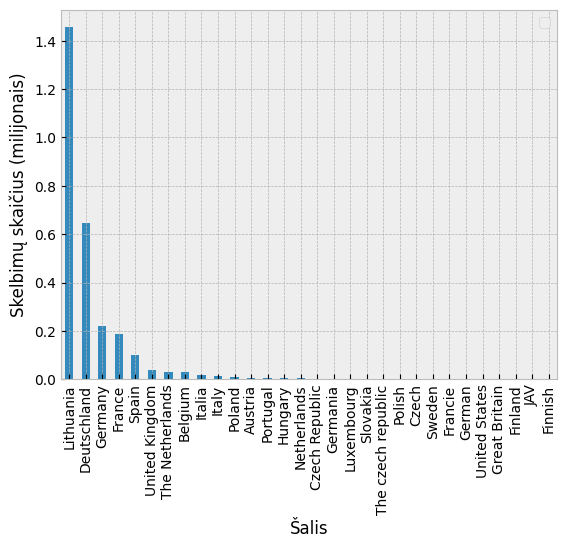

In [55]:
country_values_series = country_values.groupby('item_country').sum() / 1e6
country_values_series\
    .sort_values('count', ascending=False)\
    .plot.bar()

plt.xlabel('Šalis')
plt.ylabel('Skelbimų skaičius (milijonais)')
plt.legend([])

In [56]:
import nltk

def token_count(text):
    tokens = nltk.word_tokenize(str(text)) 
    return len(tokens)

data['description_token_kiekis'] = data['item_description'].apply(token_count)

print(data[['item_description', 'description_token_kiekis']].head(2))

                                    item_description  description_token_kiekis
0  Šilko užvalkalai pagalvei Nauji, šilko užvalka...                        13
1  Avalynė 41 dydis   Avalynė dėvėta, išvalius, n...                        11


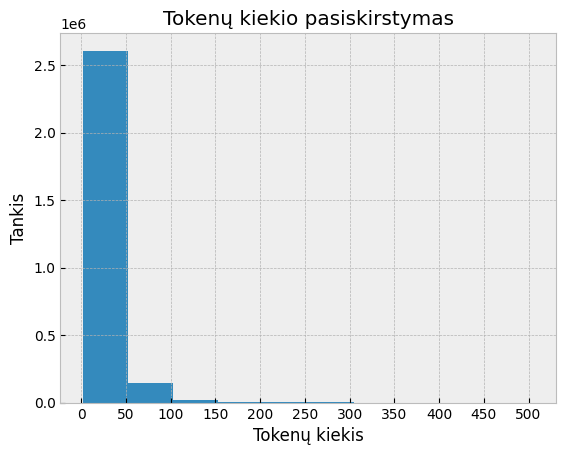

In [57]:
plt.hist(data['description_token_kiekis'])

plt.title('Tokenų kiekio pasiskirstymas')
plt.ylabel('Tankis')
plt.xlabel('Tokenų kiekis')
plt.xticks(np.arange(0, data['description_token_kiekis'].max() + 1, 50))


plt.show()

In [58]:
import re

def token_count_beskyr(text):
    text = re.sub(r'[^\w\s]', '', str(text))
    tokens = nltk.word_tokenize(text)
    return len(tokens)

data['description_token_kiekis_beskyr'] = data['item_description'].apply(token_count_beskyr)

print(data[['item_description', 'description_token_kiekis_beskyr']].head(2))

                                    item_description  \
0  Šilko užvalkalai pagalvei Nauji, šilko užvalka...   
1  Avalynė 41 dydis   Avalynė dėvėta, išvalius, n...   

   description_token_kiekis_beskyr  
0                               12  
1                                9  


In [59]:
sns.hist(data['description_token_kiekis_beskyr'])

plt.title('Tokenų kiekio pasiskirstymas (be skyrybos)')
plt.ylabel('Tankis')
plt.xlabel('Tokenų kiekis (be skyrybos)')
plt.xticks(np.arange(0, data['description_token_kiekis'].max() + 1, 50))
plt.show()

AttributeError: module 'seaborn' has no attribute 'hist'

In [ ]:
import numpy as np

bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

counts, bin_edges = np.histogram(data['description_token_kiekis'], bins=bins)

for i in range(len(counts)):
    print(f"Intervalas {bin_edges[i]} - {bin_edges[i+1]}: {counts[i]} reikšmių")

In [ ]:
import numpy as np

bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

counts, bin_edges = np.histogram(data['description_token_kiekis_beskyr'], bins=bins)

for i in range(len(counts)):
    print(f"Intervalas {bin_edges[i]} - {bin_edges[i+1]}: {counts[i]} reikšmių")

In [ ]:
plt.hist(data['description_token_kiekis_beskyr'])

plt.title('Tokenų kiekio pasiskirstymas (be skyrybos)')
plt.ylabel('Eilučių skaičius (milijonais)')
plt.xlabel('Tokenų kiekis (be skyrybos)')
plt.xticks(np.arange(0, data['description_token_kiekis'].max() + 1, 50))
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda y, _: f'{y/1e6:.1f}'))
plt.show()


In [ ]:
plt.hist(data['description_token_kiekis'])

plt.title('Tokenų kiekio pasiskirstymas')
plt.ylabel('Eilučių skaičius (milijonais)')
plt.xlabel('Tokenų kiekis')
plt.xticks(np.arange(0, data['description_token_kiekis'].max() + 1, 50))
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda y, _: f'{y/1e6:.1f}'))
plt.show()